In [31]:
import os,sys
import glob
import pandas
from osgeo import gdal
import datetime 
from dateutil import parser
import numpy as np
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import stackConfigs as sC


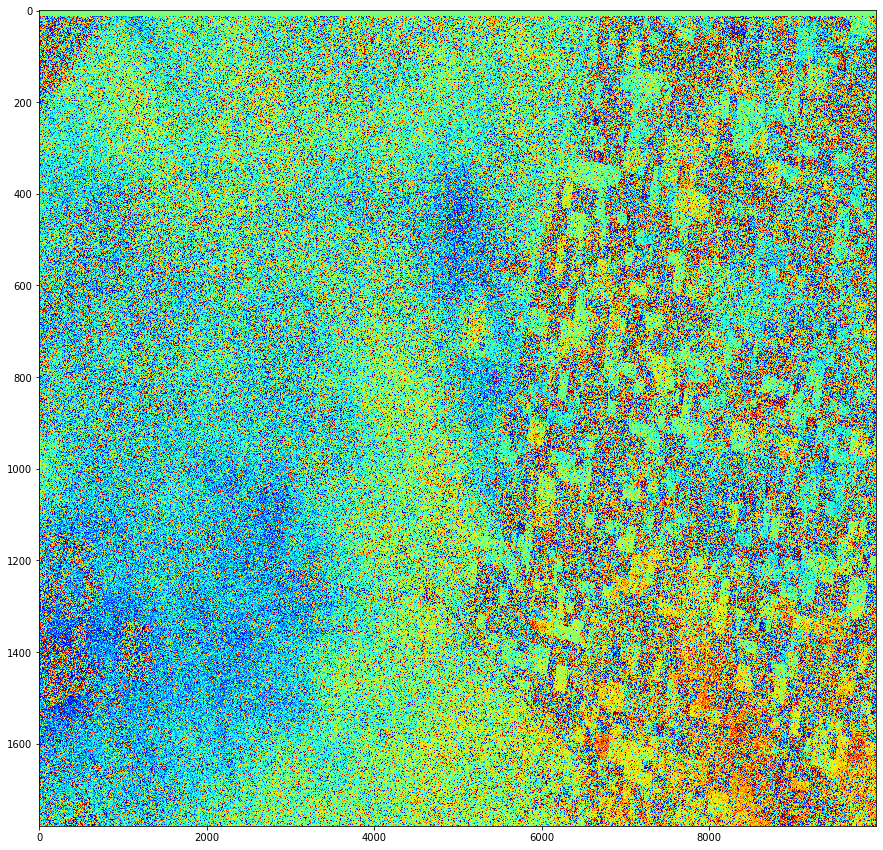

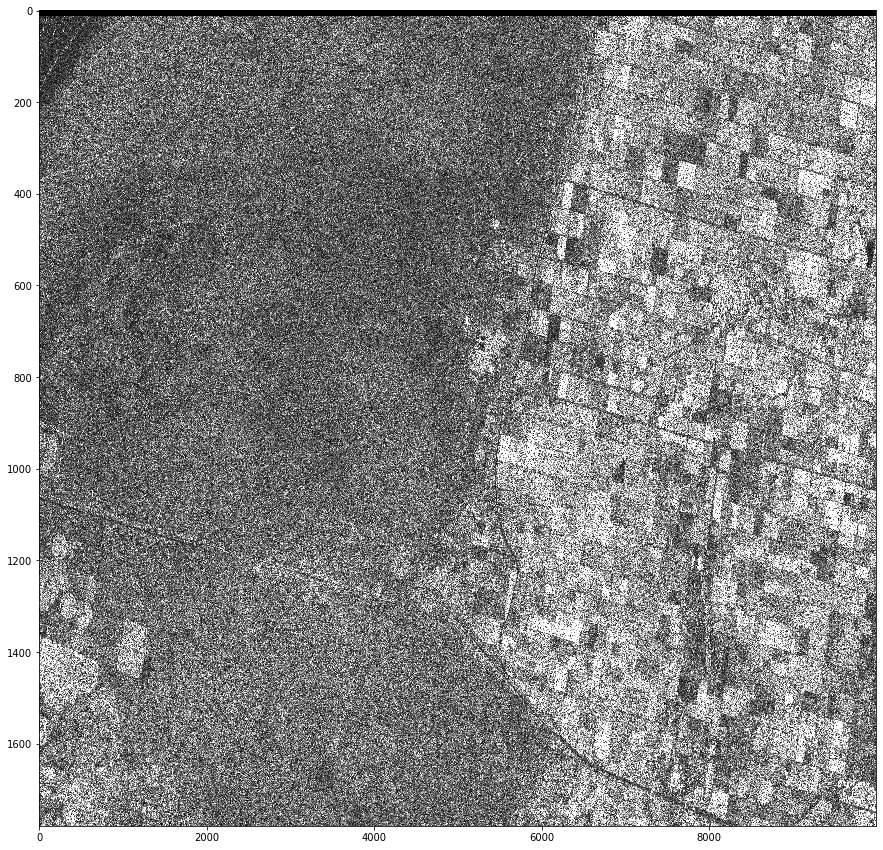

In [52]:
cropdir='cropped_9000_20_10000_1780'
date1='20171025'
date2='20171106'
x1=0
dx=10000
y1=0
dy=1780

ds = gdal.Open("/home/jovyan/"+sC.workdir+"/"+cropdir+"/SLC_vv/"+date1+"/"+date1+".slc.full", gdal.GA_ReadOnly)
slc1 = ds.GetRasterBand(1).ReadAsArray(x1,y1,dx,dy)

ds = gdal.Open("/home/jovyan/"+sC.workdir+"/"+cropdir+"/SLC_vv/"+date2+"/"+date2+".slc.full", gdal.GA_ReadOnly)
slc2 = ds.GetRasterBand(1).ReadAsArray(x1,y1,dx,dy)


slcphs= np.angle(slc1)
slcmag= np.abs(slc1)
int12 = slc1 * np.conj(slc2)
intphs = np.angle(int12)

plt.figure(figsize=(15, 15))
plt.imshow(intphs,vmin=-np.pi, vmax=np.pi, cmap='jet', aspect='auto',interpolation='nearest')
plt.figure(figsize=(15, 15))
plt.imshow(slcmag,vmin=0, vmax=100, cmap='gray',aspect='auto',interpolation='nearest')




/tmp/ipykernel_3960/3087696980.py:5: RuntimeWarning: invalid value encountered in true_divide
  filtimage = filtimage/a1/a2


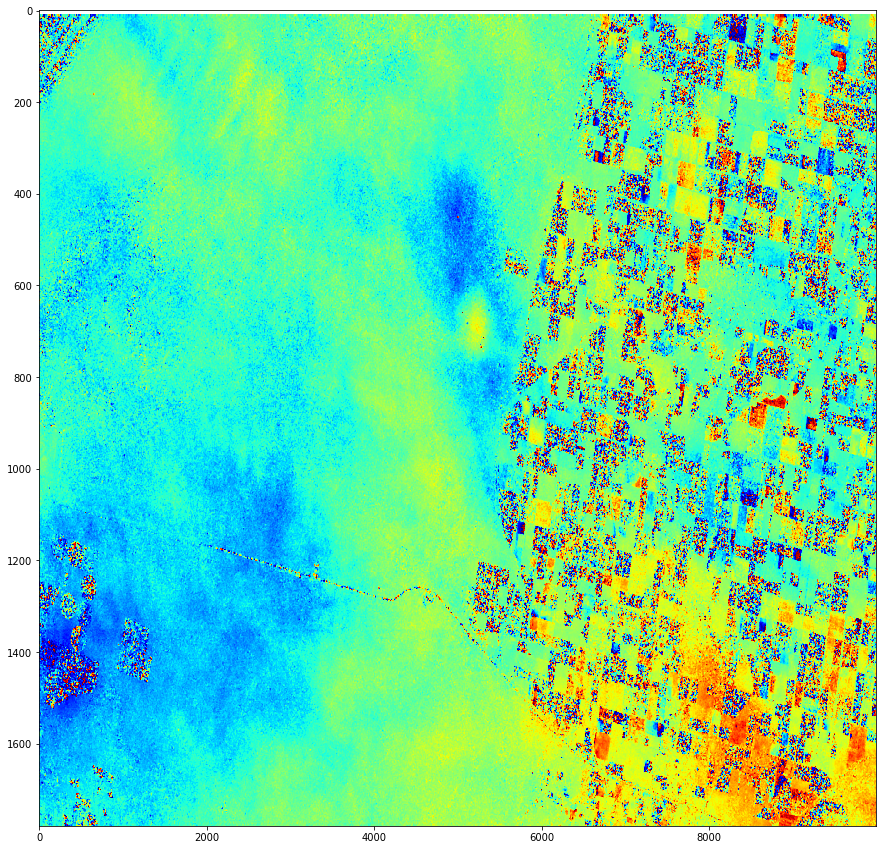

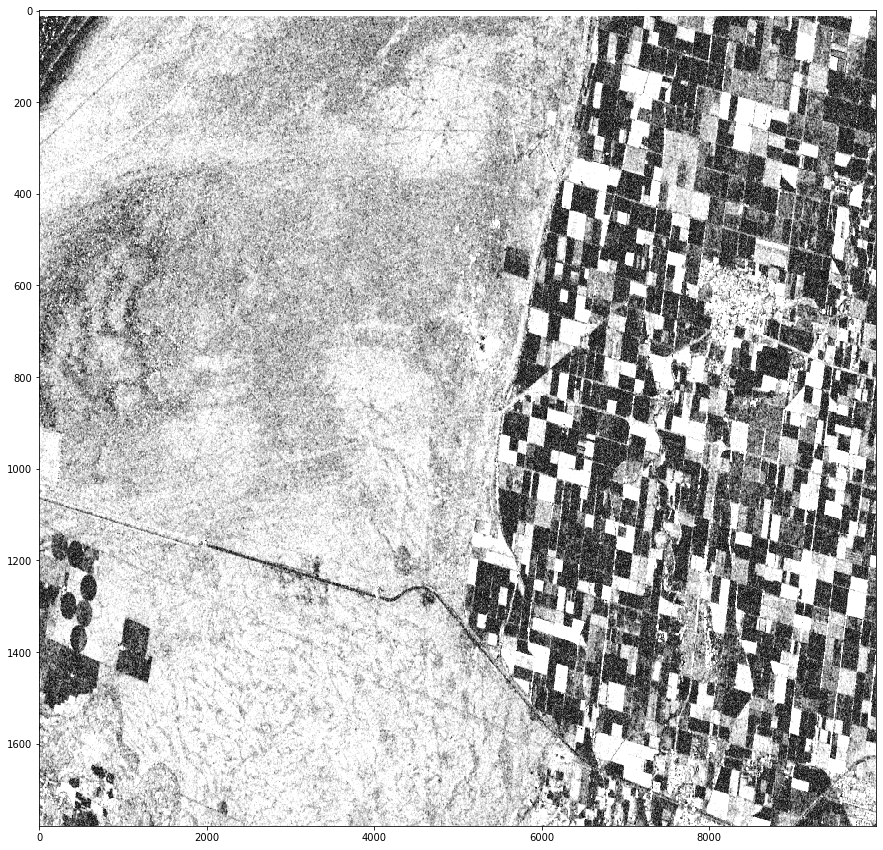

In [59]:
a1=gaussian_filter(np.abs(slc1), sigma=[sC.alooks/4,sC.rlooks/4])
a2=gaussian_filter(np.abs(slc2), sigma=[sC.alooks/4,sC.rlooks/4])

filtimage=gaussian_filter(int12, sigma=[sC.alooks/4,sC.rlooks/4])
filtimage = filtimage/a1/a2


plt.figure(figsize=(15, 15))
plt.imshow(np.angle(filtimage),vmin=-np.pi, vmax=np.pi, cmap='jet', aspect='auto',interpolation='nearest')
plt.figure(figsize=(15, 15))
plt.imshow(np.abs(filtimage),vmin = 0,vmax=1 ,cmap='gray', aspect='auto',interpolation='nearest')
